In [27]:
import pandas as pd
import plotly.express as px
import seaborn as sns

from functions import *

## 1. Data Exploration & Cleaning

### 1.1 Demographics Table

In [28]:
# Load data
df_demo = pd.read_csv('../data/raw/df_final_demo.txt')

# Rename columns and explore table
df_demo = rename_demo_columns(df_demo)
data_exploration(df_demo)

Number of rows: 70609
Number of columns: 9
Number of duplicates: 0

Numerical Columns: Index(['client_id', 'tenure_year', 'tenure_month', 'age', 'number_of_accounts',
       'balance', 'calls_6_month', 'logons_6_month'],
      dtype='object')

Categorical Columns: Index(['gender'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,70609,0,70609
1,tenure_year,float64,70595,14,54
2,tenure_month,float64,70595,14,482
3,age,float64,70594,15,165
4,gender,object,70595,14,4
5,number_of_accounts,float64,70595,14,8
6,balance,float64,70595,14,70328
7,calls_6_month,float64,70595,14,8
8,logons_6_month,float64,70595,14,9


<ins>Observations:</ins>
- For some client_ids we find a few missing values (14 to 15). Taking into account the large number of total rows (> 70k), we can fill the mising values with mean and mode for numerical and categorical columns, respectively, without changing the distribution.
- In the columns we identify seven numerical variables ('tenure_year', 'tenure_month', 'age', 'number_of_accounts', 'balance', 'calls_6_month', 'logons_6_month'), all with data type float. Some numerical variables should be integer instead ('number_of_accounts', 'calls_6_month', 'logons_6_month'). In addition, we find two categorical variables ('gender', 'client_id'), of which one ('client_id') is of type integer, but should better be string (object-type).

In [29]:
# Select categorical and numerical columns
cols_demo_numerical = ['tenure_year', 'tenure_month', 'age', 'number_of_accounts', 'balance', 'calls_6_month', 'logons_6_month']
cols_demo_categorical = ['gender', 'client_id']

# Fill missing values in numerical columns with the mean and in categorical columns with the mode
df_demo = fill_missing(df_demo, cols_demo_numerical, cols_demo_categorical)

# Change discrete numerical variables from type float to integer + client_id from integer to object
df_demo[['number_of_accounts', 'calls_6_month', 'logons_6_month']] = df_demo[['number_of_accounts', 'calls_6_month', 'logons_6_month']].astype(("int64"))
df_demo['client_id'] = df_demo['client_id'].astype("object")

# Save cleaned dataframe to csv-file
df_demo.to_csv("../data/cleaned/df_final_demo_cleaned.csv", index=False)

### 1.2 Web Data Table

In [35]:
# Load data
df_web_data_pt_1 = pd.read_csv('../data/raw/df_final_web_data_pt_1.txt')
df_web_data_pt_2 = pd.read_csv('../data/raw/df_final_web_data_pt_2.txt')

# Concatenate two parts
df_web_data = pd.concat([df_web_data_pt_1, df_web_data_pt_2], axis=0)

# Explore table
data_exploration(df_web_data)

Number of rows: 755405
Number of columns: 5
Number of duplicates: 10764

Numerical Columns: Index(['client_id'], dtype='object')

Categorical Columns: Index(['visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,755405,0,120157
1,visitor_id,object,755405,0,130236
2,visit_id,object,755405,0,158095
3,process_step,object,755405,0,5
4,date_time,object,755405,0,629363


<ins>Observations:</ins>
- We find about 11k duplicates on a total of about 750k rows. We expect the duplicates to originate from technical errors in the data collection (e.g. a client clicks on a button and this action is recorded two times).
- As in the demographics table, also here the client_id is of type integer, but should be object.
- The date_time column is of type object. We convert it to datetime and split the column in two: date and time.

In [36]:
# Select categorical and numerical columns
cols_web_numerical = []
cols_web_categorical = ['client_id', 'visitor_id', 'visit_id', 'process_step', 'data_time']

In [37]:
# Change client_id column from type integer to object
df_web_data['client_id'] = df_web_data['client_id'].astype("object")

# Change date_time column from type object to datetime and split into date and time
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])
#df_web_data['date'] = df_web_data['date_time'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
#df_web_data['time'] = df_web_data['date_time'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S.%f'))
#df_web_data = df_web_data.drop(columns='date_time')

# Drop duplicates
df_web_data = df_web_data.drop_duplicates()

# Save cleaned dataframe to csv-file
df_web_data.to_csv("../data/cleaned/df_final_web_data_cleaned.csv", index=False)

### 1.3 Experiment Clients Table

In [ ]:
# Load data
df_clients = pd.read_csv('../data/raw/df_final_experiment_clients.txt')

# Rename column and explore table
df_clients = df_clients.rename(columns={'Variation': 'variation'})
data_exploration(df_clients)

Number of rows: 70609
Number of columns: 2
Number of duplicates: 0

Numerical Columns: Index(['client_id'], dtype='object')

Categorical Columns: Index(['variation'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,70609,0,70609
1,variation,object,50500,20109,2


<ins>Observations:</ins>
- We find about 20k missing values in a total of about 120k total values. As the information about a client being in the test or the control group is critical for the analysis, we decide to drop the rows with missing values.
- Again, the client_id column should be of type object instead of integer.

In [ ]:
# Select categorical and numerical columns
cols_clients_numerical = []
cols_clients_categorical = ['client_id', 'variation']

In [ ]:
# Change client_id column from type integer to object
df_clients['client_id'] = df_clients['client_id'].astype("object")

# Drop all missing values
df_clients = df_clients.dropna(subset=["variation"])

# Save cleaned dataframe to csv-file
df_clients.to_csv("../data/cleaned/df_final_experiment_clients_cleaned.csv", index=False)

## 2. Exploratory Data Analysis

In [ ]:
# Load clean tables
df_demo = pd.read_csv('../data/cleaned/df_final_demo_cleaned.csv')
df_clients = pd.read_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv')
df_web_data = pd.read_csv('../data/cleaned/df_final_web_data_cleaned.csv')

### 2.1 Univariate EDA

#### 2.1.1 Demographics Table

In [ ]:
# Discretizing 'age' into 4 categories
bins = [12, 19, 39, 59, 100]
labels = ['Teenagers', 'Young Adults', 'Adults', 'Seniors']
df_demo['age_group'] = pd.cut(df_demo['age'], bins=bins, labels=labels, include_lowest=True).astype('object')

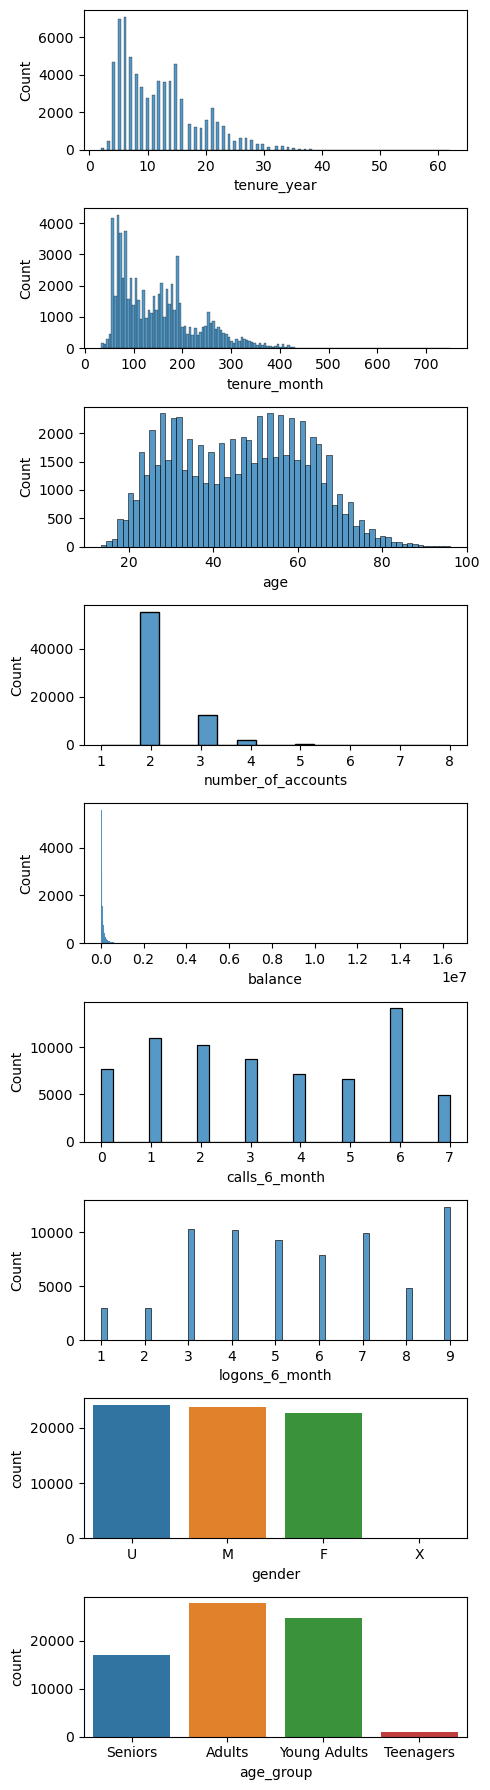

In [ ]:
# Investigate distributions
plot_distributions_numerical(df_demo, cols_demo_numerical + ['gender', 'age_group'])

<ins>Observations</ins>
- Tenure year (and month): the distribution suggests that there are years in which subsequently more people become clients and then there are years in which the acquisition of clients declines again.
- Age: the distribution shows two distinct peaks, which could be related to the trends in client acqusition seen above. In general there is a wide range of age and no trend is to be observed.
- Number of accounts: most people have two accounts, some have three and only very few have four or more.
- Balance: ...
- Calls: ...
- Logons: ...
- Gender: ...

#### 2.1.2 Web Data Table

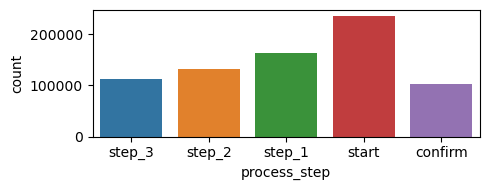

In [ ]:
# Investigate distributions
plot_distributions_numerical(df_web_data, ['process_step'])

<ins>Observations</ins>
- There are about two times as much start actions as confirm actions.

#### 2.1.3 Experiment Clients Table

In [ ]:
# Investigate distributions
df_clients['variation'].value_counts()

Test       26968
Control    23532
Name: variation, dtype: int64

<ins>Observations</ins>
- There are about 15% more clients in the test than in the control group.

### 2.2 Bivariate EDA

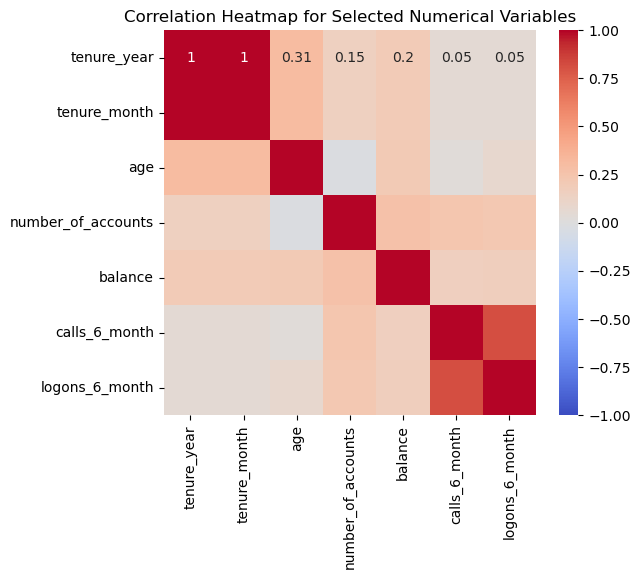

In [ ]:
correlation_matrix = df_demo[cols_demo_numerical].corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(6, 5))

# Drawing the heatmap for the numerical columns
sns.heatmap(round(correlation_matrix,2), annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

<ins>Observations</ins>
- Age and tenure year/month are correlated: the older the clients, the longer they have been clients.
- Balance is correlated with all other variables: the higher the balance, the longer the clients are already clients, the older they are, the more accounts they have, the higher the number of calls and logons in the six months.
- Number of logons and calls are very strongly correlated.

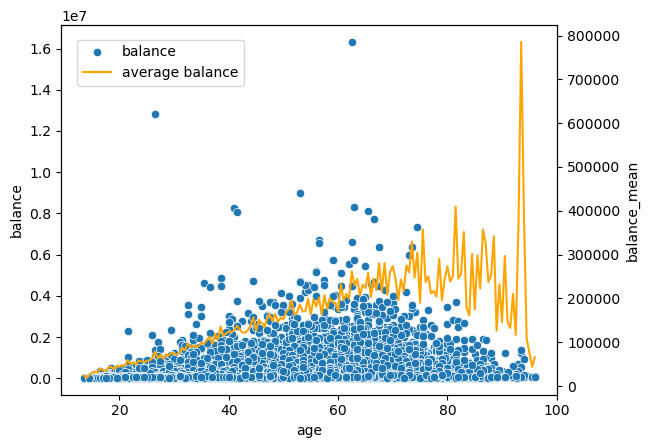

In [ ]:
# Investigate association of age and balance
df_age_bal = pd.DataFrame({'age': pd.pivot_table(df_demo, index="age", values="balance", aggfunc='mean').index,
                           'balance_mean': pd.pivot_table(df_demo, index="age", values="balance", aggfunc='mean').balance})

fig, ax = plt.subplots()
sns.scatterplot(df_demo, x="age", y="balance", ax=ax)
ax2 = ax.twinx()
sns.lineplot(df_age_bal, x="age", y="balance_mean", ax=ax2, color='orange')
fig.legend(labels=['balance','average balance'], bbox_to_anchor=(0.15, 0.85), loc='upper left', borderaxespad=0)
plt.show()

### 2.3 Test and Control Group

In [ ]:
# merge tables and only consider clients present in all three tables
df_ = pd.merge(df_web_data, df_clients, on='client_id', how='inner')
df = pd.merge(df_, df_demo, on='client_id', how='inner')

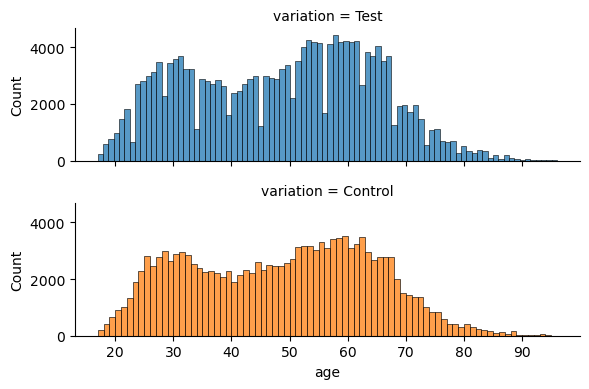

In [ ]:
g = sns.FacetGrid(df, row="variation", hue="variation", height=2, aspect=3)
g.map(sns.histplot, "age")

## 3. KPIs

### 3.1 Completion Rate
- Number of users who reached the ‘confirm’ step in relation to the total number of users in that group

### 3.2 Time Spent on each Step
- Get time difference between each step for each visit
- Calculate average duration users spend on each step before moving to the next

### 3.3 Error Rates
-  Identify instances where users go back to a previous step

## 4. Hypothesis Testing

### 4.1 Completion Rate
- Null hypothesis: completion rate of old feature = completion rate of new feature
- Alternative hypothesis: completion rate of old feature != completion rate of new feature

### 4.2 Time Spent on each Step
- Null hypothesis: time spent on completion of old feature = time spent completion rate of new feature
- Alternative hypothesis: time spent completion rate of old feature != time spent completion rate of new feature

### 4.2 Error Rates